### Reading titanic dataset and basic data processing

In [1]:
#Import libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import math
import os as os

#Import Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
os.chdir('/home/himanshu/wine_data')
data = pd.read_csv('titanic_train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#calculating mean and mode for features with missing values
data.Age.mean() 

29.69911764705882

In [6]:
data.Embarked.mode()

0    S
dtype: object

In [7]:
#imputing missing values with calculated mean and mode
data['Age'].fillna(value = '30', inplace = True)
data["Embarked"].fillna(value = "S", inplace = True)

In [8]:
data.isnull().sum()  #checking again

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
#creating dummy variables for categorical variables and droppin the first column to avoid multicollinearity
data = pd.get_dummies(data, columns = ['Pclass', 'Sex', 'Embarked'], drop_first = True)

In [10]:
#dropping few columns and target variable('Survived')
X1 = data
Y = data.Survived
X = X1.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Survived'], axis = 1)

In [11]:
X.shape

(891, 9)

In [12]:
Y = Y.reshape(1,-1)

/home/himanshu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [13]:
Y.shape

(1, 891)

In [14]:
#Scaling variable values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [15]:
#Splitting dataset into training and cross-validation sets
from sklearn.cross_validation import train_test_split

X_train, X_cv, Y_train, Y_cv = train_test_split(X,data.Survived, test_size = 0.2, random_state = 56)

/home/himanshu/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
Y_train = Y_train.reshape(1,-1)
Y_cv = Y_cv.reshape(1,-1)

/home/himanshu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/home/himanshu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


### Logistic Regression Model

In [17]:
## no. of data points
m = len(X)       

## initialting weight matrix
t0 = 1

W = np.zeros(X.shape[1]).reshape(1,-1)
W.shape

(1, 9)

In [18]:
##Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z = t0 + W.dot(X.T)
h = sigmoid(z)

In [19]:
## Log-loss function
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [20]:
initial_cost = loss(h, Y)
print 'initial_cost = %f' %(initial_cost)

initial_cost = 0.929423


In [21]:
def Gradient_descent(x, y, alpha, max_iter):
    
    W = np.zeros(x.shape[1]).reshape(1,-1)
    cost_i = [0]*max_iter
    m = len(x)
    t0 = 1   
    a = []
    
    for i in range(max_iter):
        
        z = t0 + W.dot(x.T)     
        h = sigmoid(z)    ## hypothesis func
        
        train_loss = h - y      ## training loss
        
        ## gradient calculation
        grad0 = train_loss/m
        grad1 = np.dot(train_loss,x)/m
        
        ## updating weights
        t0 = t0 - alpha*grad0
        W = W - alpha*grad1 
        
        ## cost function  
        loss = loss(h,y)
        
        cost_i[i] = loss
        print 'training_cost[i] = %f' %(cost_i[i])

    plt.plot(range(max_iter), cost_i)
    plt.ylabel('Training loss')
    plt.xlabel('Iteration')
    plt.show()
    
    return h, t0, W,loss

In [ ]:
## Training Cycle
Y_pred_train,t0_train,W_train, cost_train =  Gradient_descent(X_train, Y_train, alpha = 3, max_iter=1000)

In [78]:
## Cross-validation cycle
z = t0_train.item(711) + W_train.dot(X_cv.T)
h = sigmoid(z)

In [79]:
## Cross-validation loss
print loss(h,Y_cv)

1.3977554328522659

AUC_score = 0.87


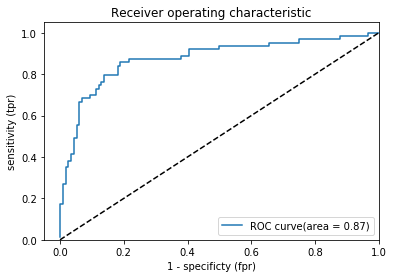

In [80]:
## Changing dimensions to be read by roc_auc_score
Y_cv = Y_cv.reshape(-1,1)
h = h.reshape(-1,1)

## Evaluating model using ROC ~ area under the curve
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(Y_cv, h)

print "AUC_score = %2.2f" % ROC_AUC

#Building ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_cv, h)

plt.figure()
plt.plot(fpr, tpr, label = "ROC curve(area = %0.2f)" % ROC_AUC)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([-0.05,1.0]) 
plt.ylim([0.0,1.05])
plt.xlabel('1 - specificty (fpr)')
plt.ylabel('sensitivity (tpr)')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()